In [112]:
#!pip install seaborn

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = r"sales_data.csv"

df = pd.read_csv(file)

df.info()

dfStores = df[["Store ID", "Region"]]
dfUnique = dfStores.drop_duplicates()
print(f"Unique stores: \n{dfUnique}")

dfDemand = df.groupby("Store ID")["Demand"].sum()
print(f"Store Demand: \n{dfDemand}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

Based on the results of demand by store, I will focus the analysis and forecasting on store ID 5002 as it has the highest demand.

In [114]:
#filter the df down to store ID 5002
df = df[df["Store ID"] == "S002"]

#Show the data shape and search for necessary data cleaning
print(f"shape: \n{df.shape}\n")
print(f"nulls: \n{df.isnull().sum()}\n")

print(f"Columns: \n{df.columns}\n")
print(f"Head: \n{df.head()}\n")

shape: 
(15200, 16)

nulls: 
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Price                 0
Discount              0
Weather Condition     0
Promotion             0
Competitor Pricing    0
Seasonality           0
Epidemic              0
Demand                0
dtype: int64

Columns: 
Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Weather Condition', 'Promotion', 'Competitor Pricing', 'Seasonality',
       'Epidemic', 'Demand'],
      dtype='object')

Head: 
          Date Store ID Product ID     Category Region  Inventory Level  \
20  2022-01-01     S002      P0001    Groceries  South              102   
21  2022-01-01     S002      P0002         Toys  South              193   
22  2022-01-01     S002      P0003    Groceries  South     

In [115]:
print(df.describe())

       Inventory Level    Units Sold  Units Ordered         Price  \
count     15200.000000  15200.000000   15200.000000  15200.000000   
mean        332.014737     91.192500      91.530855     64.401070   
std         223.255752     43.588611     172.087402     32.352922   
min           0.000000      0.000000       0.000000     11.580000   
25%         156.000000     61.000000       0.000000     30.277500   
50%         281.000000     87.000000       0.000000     66.880000   
75%         458.000000    116.000000     120.000000     87.882500   
max        1968.000000    356.000000    1223.000000    170.170000   

           Discount     Promotion  Competitor Pricing      Epidemic  \
count  15200.000000  15200.000000        15200.000000  15200.000000   
mean       9.101645      0.328947           66.094872      0.200000   
std        7.464449      0.469846           33.807128      0.400013   
min        0.000000      0.000000           10.680000      0.000000   
25%        5.000000    

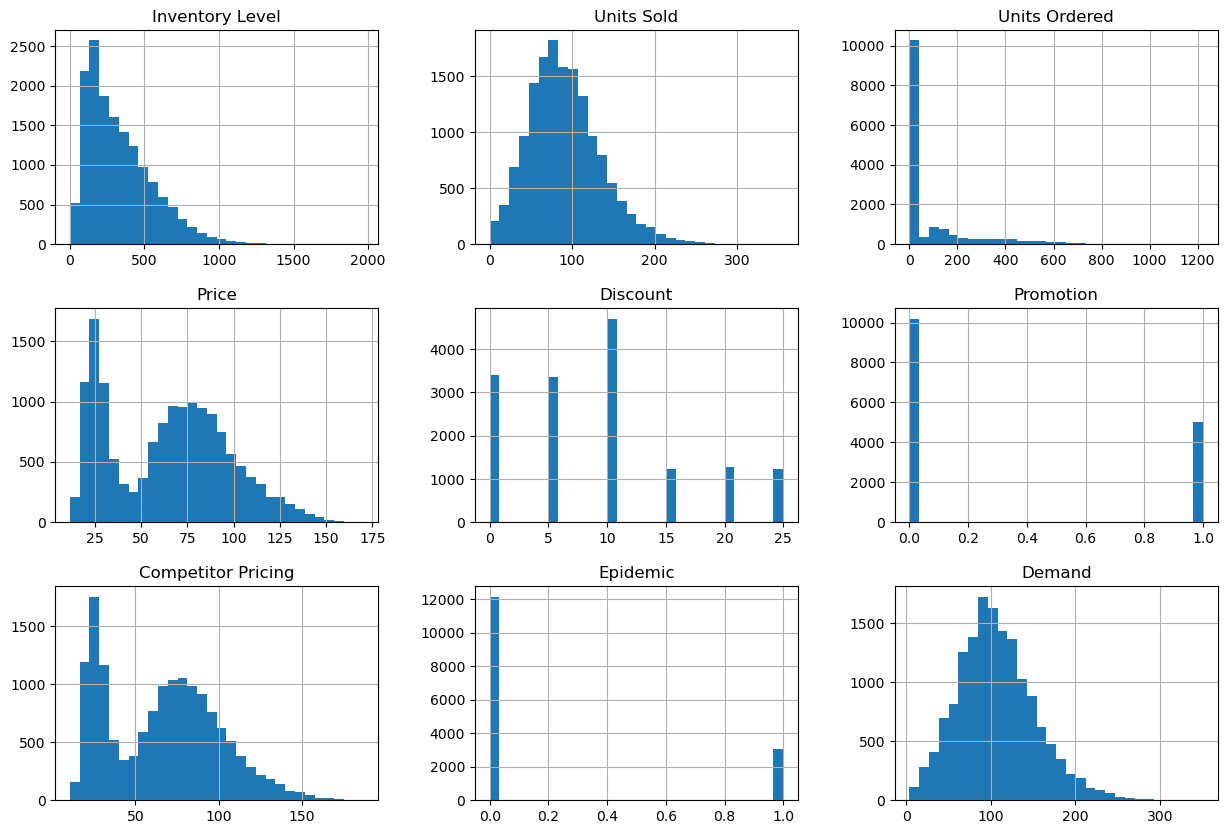

In [116]:
df.hist(bins=30, figsize=(15,10))
plt.show()

Histogram Observations:
- Non-epidemic days more prevalent than epidemic days
- Most common discount at 10%

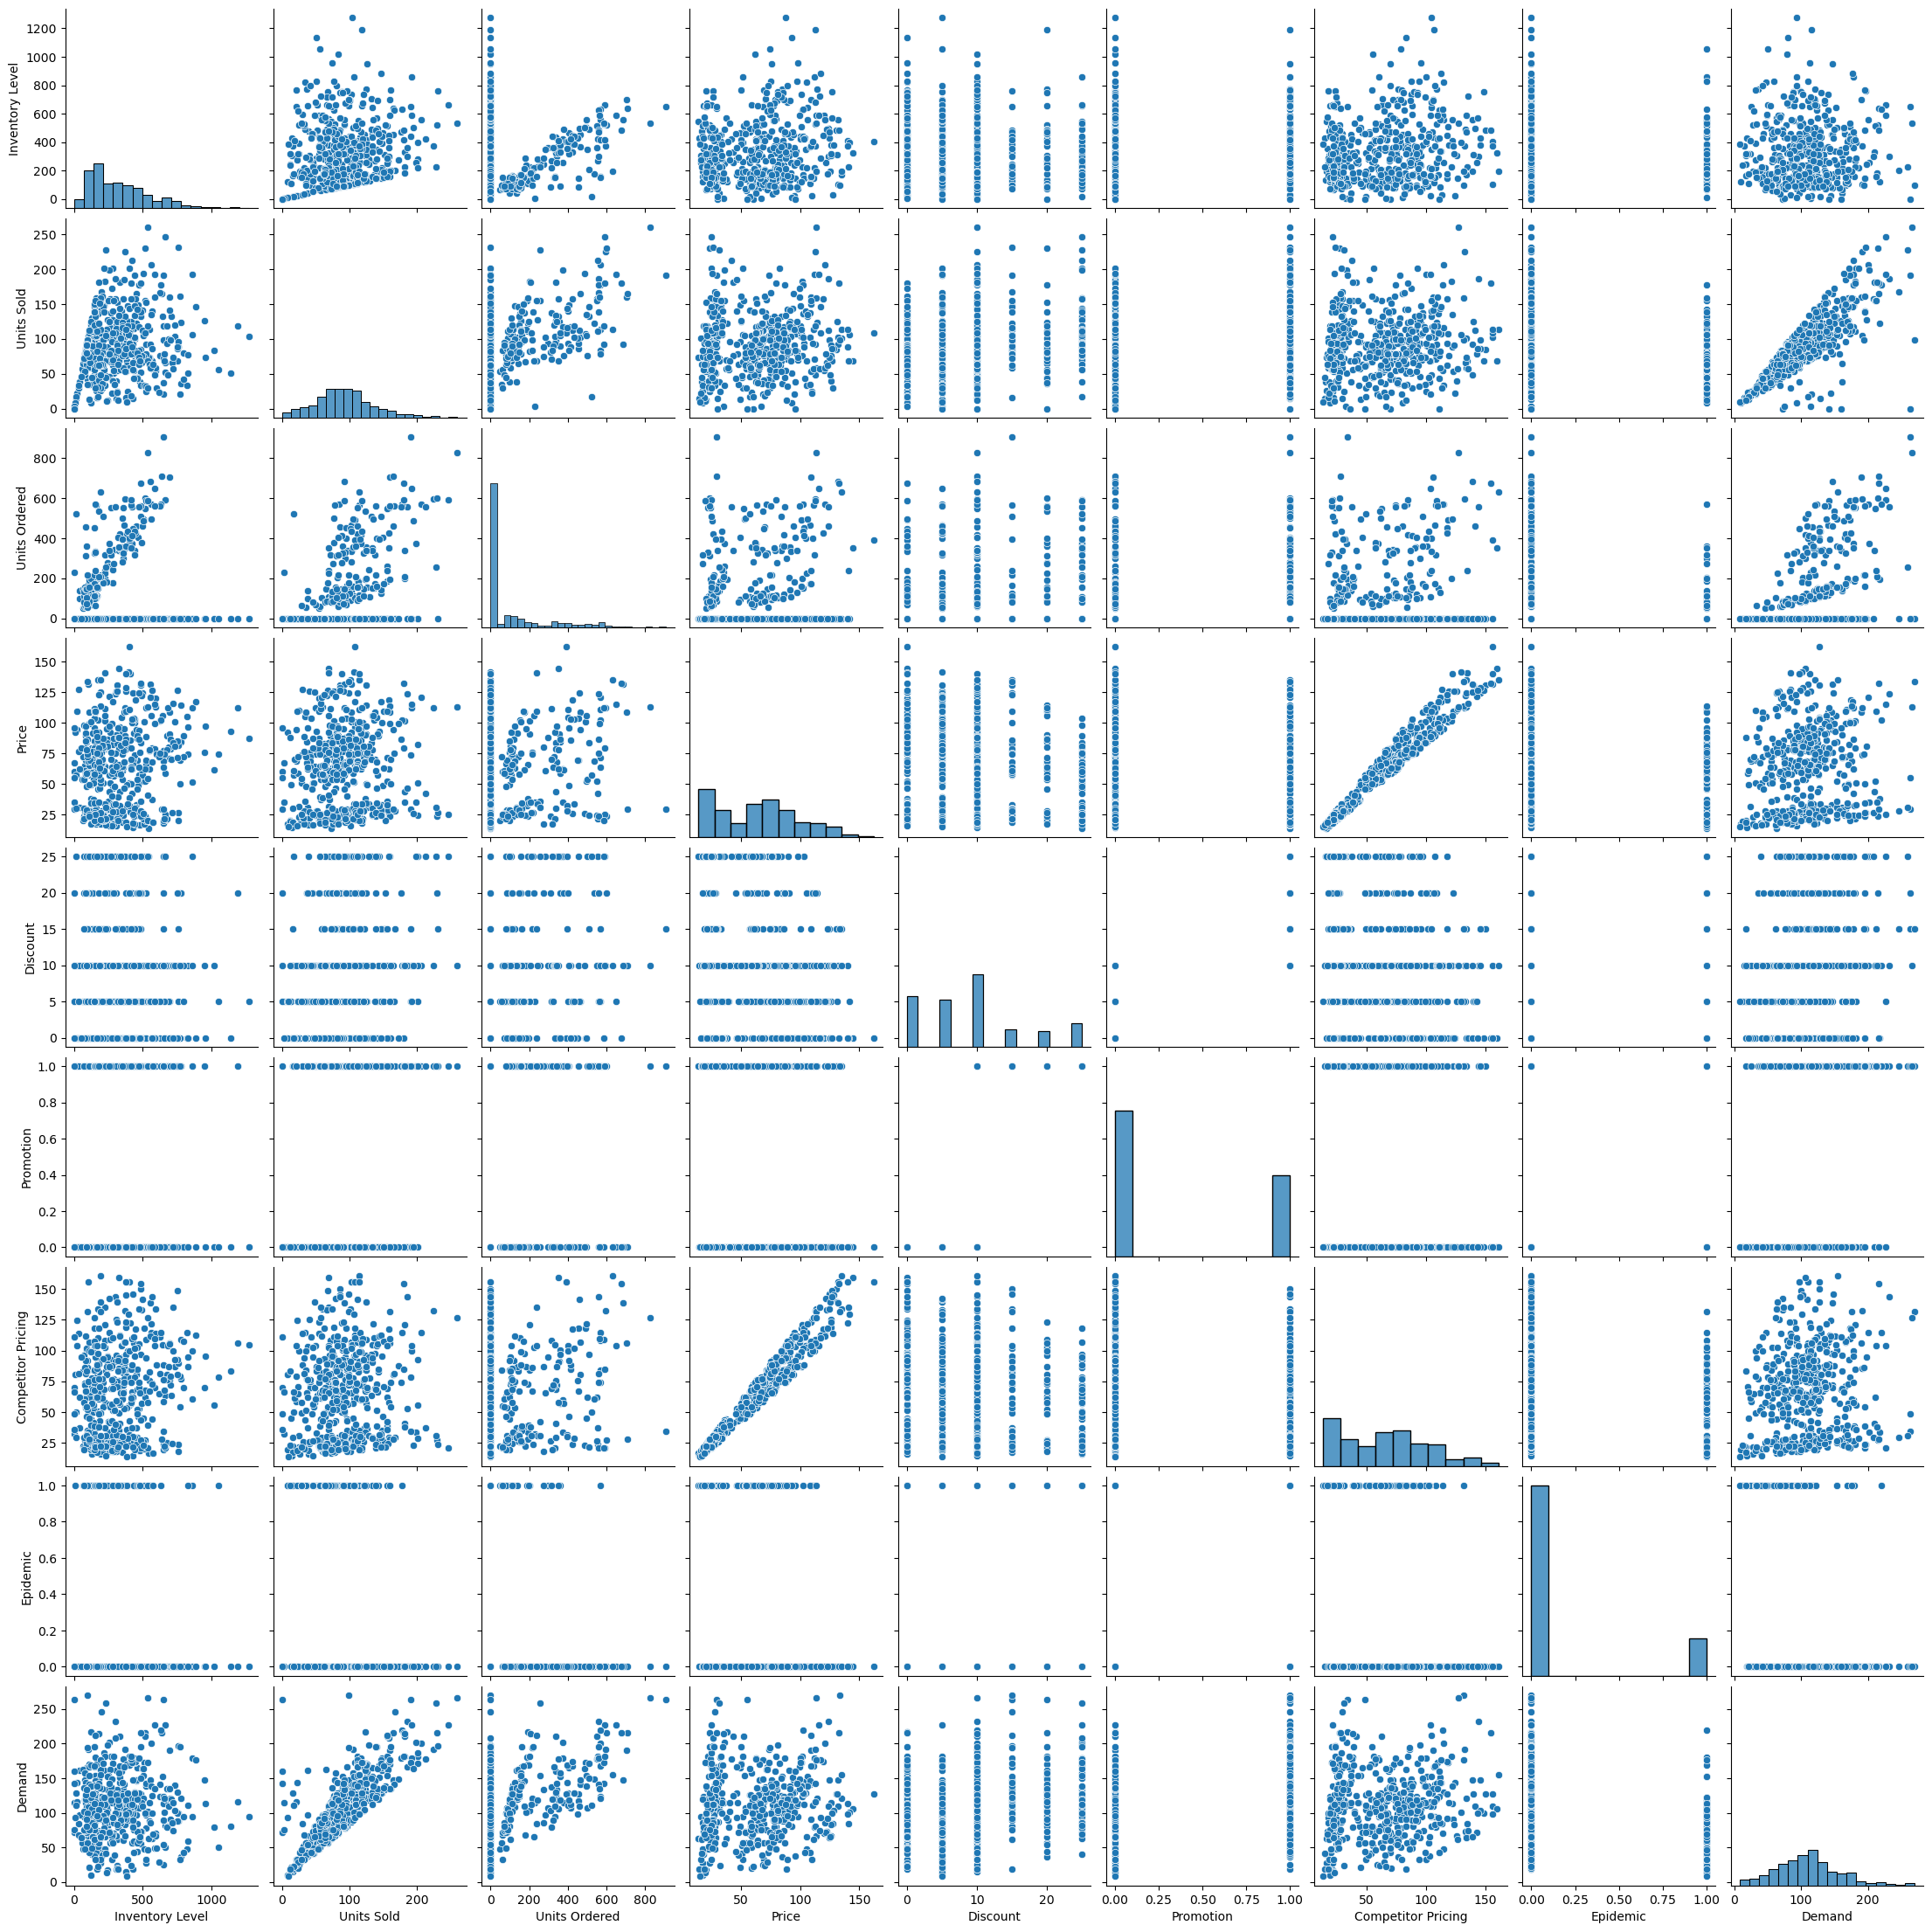

In [117]:
sns.pairplot(df.sample(500))

General Pair-Plot Observations:
- Positive correlation between promotion and demand
- Positive correlation between discount and demand. Demand seems highest at 10% discount? Could be a sample bias.

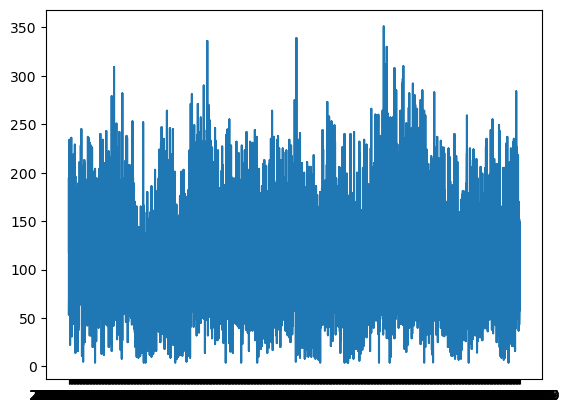

In [118]:
x = df["Date"]
y = df["Demand"]

pltDemand = plt.plot(x,y)